# Plotting with seaborn

ScmData provides limited support for plotting. However, we make it as easy as possible to return data in a format which can be used with the [seaborn](https://seaborn.pydata.org/index.html) plotting library. Given the power of this library, we recommend having a look through its documentation if you want to make anything more than the most basic plots.

In [1]:
# NBVAL_IGNORE_OUTPUT
import matplotlib.pyplot as plt
import seaborn as sns
from scmdata.run import ScmRun
from scmdata.plotting import RCMIP_SCENARIO_COLOURS

## Data

For this notebook we use the RCMIP radiative forcings, available at rcmip.org.

In [2]:
# NBVAL_IGNORE_OUTPUT
rcmip_db = ScmRun("rcmip-radiative-forcing-annual-means-v4-0-0.csv")
rcmip_db.head()

time                                                                                                                         1750-01-01 00:00:00  1751-01-01 00:00:00  1752-01-01 00:00:00  1753-01-01 00:00:00  1754-01-01 00:00:00  \
activity_id    mip_era model region scenario unit  variable                                                                                                                                                                            
not_applicable CMIP5   AIM   World  rcp60    W/m^2 Radiative Forcing                                                                         NaN                  NaN                  NaN                  NaN                  NaN   
                                                   Radiative Forcing|Anthropogenic                                                           NaN                  NaN                  NaN                  NaN                  NaN   
                                                   Radiative Forcing|Anthropogenic|Aerosols                                                  NaN                  NaN                  NaN                  NaN                  NaN   
                                                   Radiative Forcing|Anthropogenic|Aerosols|Aerosols-cloud Interactions                      NaN                  NaN                  NaN                  NaN                  NaN   
                                                   Radiative Forcing|Anthropogenic|Aerosols|Aerosols-radiation Interactions                  NaN                  NaN                  NaN                  NaN                  NaN   

time                                                                                                                         1755-01-01 00:00:00  1756-01-01 00:00:00  ...  2494-01-01 00:00:00  2495-01-01 00:00:00  2496-01-01 00:00:00  \
activity_id    mip_era model region scenario unit  variable                                                                                                            ...                                                                  
not_applicable CMIP5   AIM   World  rcp60    W/m^2 Radiative Forcing                                                                         NaN                  NaN  ...             5.993838             5.993838             5.993838   
                                                   Radiative Forcing|Anthropogenic                                                           NaN                  NaN  ...             5.890082             5.890082             5.890082   
                                                   Radiative Forcing|Anthropogenic|Aerosols                                                  NaN                  NaN  ...            -0.603691            -0.603691            -0.603691   
                                                   Radiative Forcing|Anthropogenic|Aerosols|Aerosols-cloud Interactions                      NaN                  NaN  ...            -0.465404            -0.465404            -0.465404   
                                                   Radiative Forcing|Anthropogenic|Aerosols|Aerosols-radiation Interactions                  NaN                  NaN  ...            -0.138286            -0.138286            -0.138286   

time                                                                                                                         2497-01-01 00:00:00  2498-01-01 00:00:00  2499-01-01 00:00:00  2500-01-01 00:00:00  
activity_id    mip_era model region scenario unit  variable                                                                                                                                                      
not_applicable CMIP5   AIM   World  rcp60    W/m^2 Radiative Forcing                                                                    5.993838             5.993838             5.993838             5.993838  
                                                   Radiative Forcing|Anthropogenic   

## Plotting with ScmRun

For the most common plotting patterns, we provide a very simple `lineplot` method in `ScmRun`.

<AxesSubplot:xlabel='time', ylabel='W/m^2'>

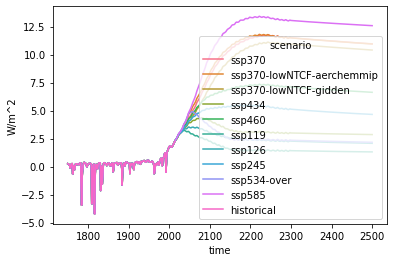

In [3]:
# NBVAL_IGNORE_OUTPUT
out = rcmip_db.filter(variable="Effective Radiative Forcing").lineplot()
out

``kwargs`` passed to this method are given directly to [``seaborn.lineplot``](https://seaborn.pydata.org/generated/seaborn.lineplot.html), which allows an extra layer of control.

For example, we can plot on slightly bigger axes, make the lines slightly transparent, add markers for the different models, specify the colour to use for each scenario and specify the order to display the scenarios in.

<AxesSubplot:xlabel='time', ylabel='W/m^2'>

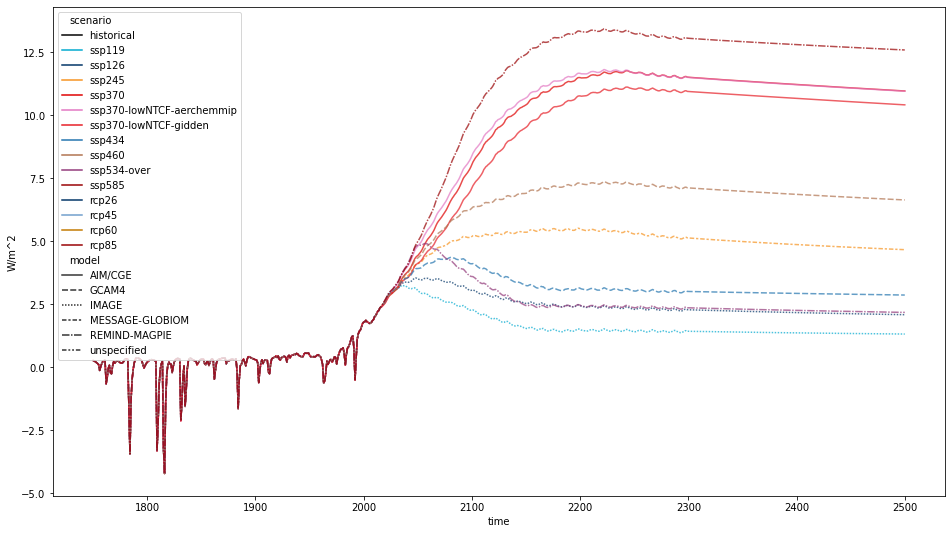

In [4]:
# NBVAL_IGNORE_OUTPUT
ax = plt.figure(figsize=(16, 9)).add_subplot(111)
rcmip_db.filter(variable="Effective Radiative Forcing").lineplot(
    ax=ax,
    hue="scenario",
    palette=RCMIP_SCENARIO_COLOURS,
    hue_order=RCMIP_SCENARIO_COLOURS.keys(),
    style="model",
    alpha=0.7,
)

### Specifying the time axis

Plotting with a `datetime.datetime` time axis is not always convenient. To address this, we provide the `time_axis` keyword argument. The options are available in the `lineplot` docstring.

In [5]:
print(rcmip_db.lineplot.__doc__)


    Make a line plot via `seaborn's lineplot
    <https://seaborn.pydata.org/generated/seaborn.lineplot.html>`_

    If only a single unit is present, it will be used as the y-axis label.
    The axis object is returned so this can be changed by the user if desired.

    Parameters
    ----------
    time_axis : {None, "year", "year-month", "days since 1970-01-01", "seconds since 1970-01-01"}  # noqa: E501
        Time axis to use for the plot.

        If ``None``, :class:`datetime.datetime` objects will be used.

        If ``"year"``, the year of each time point  will be used.

        If ``"year-month"``, the year plus (month - 0.5) / 12  will be used.

        If ``"days since 1970-01-01"``, the number of days since 1st Jan 1970 will be
        used (calculated using the :mod:`datetime` module).

        If ``"seconds since 1970-01-01"``, the number of seconds  since 1st Jan 1970 will
        be used (calculated using the :mod:`datetime` module).

    **kwargs
        Keyword arg

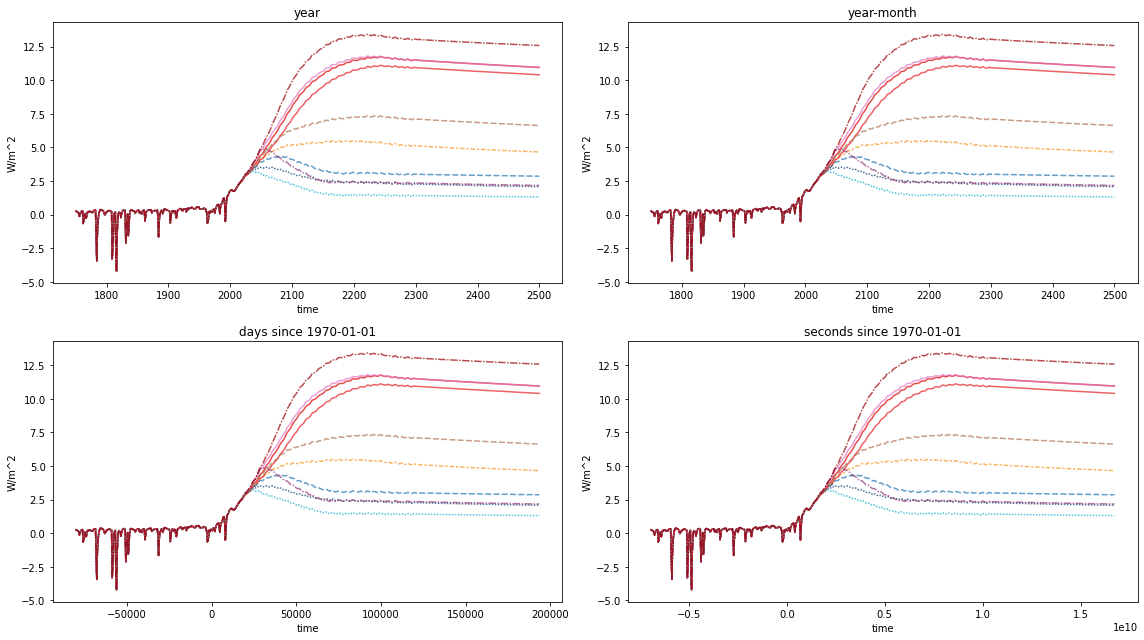

In [6]:
# NBVAL_IGNORE_OUTPUT
fig, axes = plt.subplots(figsize=(16, 9), nrows=2, ncols=2)

pdb = rcmip_db.filter(variable="Effective Radiative Forcing")
for ax, time_axis in zip(
    axes.flatten(),
    [
        "year",
        "year-month",
        "days since 1970-01-01",
        "seconds since 1970-01-01",
    ],
):
    pdb.lineplot(
        ax=ax,
        hue="scenario",
        palette=RCMIP_SCENARIO_COLOURS,
        hue_order=RCMIP_SCENARIO_COLOURS.keys(),
        style="model",
        alpha=0.7,
        time_axis=time_axis,
        legend=False,
    )
    ax.set_title(time_axis)

plt.tight_layout()

These same options can also be passed to the `timeseries` and `long_data` methods.

In [7]:
# NBVAL_IGNORE_OUTPUT
rcmip_db.timeseries(time_axis="year-month")

time                                                                                                                                               1750.041667  1751.041667  1752.041667  1753.041667  1754.041667  1755.041667  1756.041667  ...  \
activity_id    mip_era model       region scenario         unit  variable                                                                                                                                                                     ...   
not_applicable CMIP5   AIM         World  rcp60            W/m^2 Radiative Forcing                                                                         NaN          NaN          NaN          NaN          NaN          NaN          NaN  ...   
                                                                 Radiative Forcing|Anthropogenic                                                           NaN          NaN          NaN          NaN          NaN          NaN          NaN  ...   
                                                                 Radiative Forcing|Anthropogenic|Aerosols                                                  NaN          NaN          NaN          NaN          NaN          NaN          NaN  ...   
                                                                 Radiative Forcing|Anthropogenic|Aerosols|Aerosols-cloud Interactions                      NaN          NaN          NaN          NaN          NaN          NaN          NaN  ...   
                                                                 Radiative Forcing|Anthropogenic|Aerosols|Aerosols-radiation Interactions                  NaN          NaN          NaN          NaN          NaN          NaN          NaN  ...   
                                                                 Radiative Forcing|Anthropogenic|Aerosols|Aerosols-radiation Interactions|Biom...          NaN          NaN          NaN          NaN          NaN          NaN          NaN  ...   
                                                                 Radiative Forcing|Anthropogenic|Aerosols|Aerosols-radiation Interactions|Foss...          NaN          NaN          NaN          NaN          NaN          NaN          NaN  ...   
                                                                 Radiative Forcing|Anthropogenic|Aerosols|Aerosols-radiation Interactions|Foss...          NaN          NaN          NaN          NaN          NaN          NaN          NaN  ...   
                                                                 Radiative Forcing|Anthropogenic|Aerosols|Aerosols-radiation Interactions|Foss...          NaN          NaN          NaN          NaN          NaN          NaN          NaN  ...   
                                                                 Radiative Forcing|Anthropogenic|Aerosols|Aerosols-radiation Interactions|Foss...          NaN          NaN          NaN          NaN          NaN          NaN          NaN  ...   
...                                                                                                                                                        ...          ...          ...          ...          ...          ...          ...  ...   
                       unspecified World  historical-cmip5 W/m^2 Radiative Forcing|Anthropogenic|Montreal Gases|Halon2402                                  NaN          NaN          NaN          NaN          NaN          NaN          NaN  ...   
                                                                 Radiative Forcing|Anthropogenic|N2O                                                       NaN          NaN          NaN          NaN          NaN          NaN          NaN  ...   
                                                                 Radiative Forcing|Anthropogenic|Other                                                     NaN          NaN          NaN          NaN          NaN          NaN          NaN  ...   
                                                                 Radiative Forci

In [8]:
# NBVAL_IGNORE_OUTPUT
rcmip_db.long_data(time_axis="days since 1970-01-01")

,activity_id,mip_era,model,region,scenario,unit,variable,time,value
0,not_applicable,CMIP5,AIM,World,rcp60,W/m^2,Radiative Forcing,-74874,0.000000
1,not_applicable,CMIP5,AIM,World,rcp60,W/m^2,Radiative Forcing,-74509,0.126027
2,not_applicable,CMIP5,AIM,World,rcp60,W/m^2,Radiative Forcing,-74144,0.273031
3,not_applicable,CMIP5,AIM,World,rcp60,W/m^2,Radiative Forcing,-73779,0.278871
4,not_applicable,CMIP5,AIM,World,rcp60,W/m^2,Radiative Forcing,-73413,0.242045
5,not_applicable,CMIP5,AIM,World,rcp60,W/m^2,Radiative Forcing,-73048,0.242824
6,not_applicable,CMIP5,AIM,World,rcp60,W/m^2,Radiative Forcing,-72683,0.284142
7,not_applicable,CMIP5,AIM,World,rcp60,W/m^2,Radiative Forcing,-72318,0.299857
8,not_applicable,CMIP5,AIM,World,rcp60,W/m^2,Radiative Forcing,-71952,0.290756
9,not_applicable,CMIP5,AIM,World,rcp60,W/m^2,Radiative Forcing,-71587,0.278100


## Plotting with seaborn

If you wish to make plots which are more complex than this most basic pattern, a combination of seaborn and pandas reshaping is your best bet.

### Plotting on a grid

Often we wish to look at lots of different variables at once. Seaborn allows this sort of 'gridded' plotting, as shown below.

In [9]:
vars_to_plot = ["Effective Radiative Forcing"] + [
    "Effective Radiative Forcing|{}".format(v)
    for v in [
        "Anthropogenic",
        "Anthropogenic|Aerosols",
        "Anthropogenic|CO2",
        "Anthropogenic|CH4",
        "Anthropogenic|N2O",
    ]
]
vars_to_plot

['Effective Radiative Forcing',
 'Effective Radiative Forcing|Anthropogenic',
 'Effective Radiative Forcing|Anthropogenic|Aerosols',
 'Effective Radiative Forcing|Anthropogenic|CO2',
 'Effective Radiative Forcing|Anthropogenic|CH4',
 'Effective Radiative Forcing|Anthropogenic|N2O']

In [10]:
# NBVAL_IGNORE_OUTPUT
seaborn_df = rcmip_db.filter(variable=vars_to_plot).long_data()
seaborn_df.head()

,activity_id,mip_era,model,region,scenario,unit,variable,time,value
0,not_applicable,CMIP6,AIM/CGE,World,ssp370,W/m^2,Effective Radiative Forcing,1750-01-01 00:00:00,0.259367
1,not_applicable,CMIP6,AIM/CGE,World,ssp370,W/m^2,Effective Radiative Forcing,1751-01-01 00:00:00,0.242788
2,not_applicable,CMIP6,AIM/CGE,World,ssp370,W/m^2,Effective Radiative Forcing,1752-01-01 00:00:00,0.214656
3,not_applicable,CMIP6,AIM/CGE,World,ssp370,W/m^2,Effective Radiative Forcing,1753-01-01 00:00:00,0.179488
4,not_applicable,CMIP6,AIM/CGE,World,ssp370,W/m^2,Effective Radiative Forcing,1754-01-01 00:00:00,0.145354


With the output of `.long_data()` we can directly use [``seaborn.relplot``](https://seaborn.pydata.org/generated/seaborn.relplot.html).

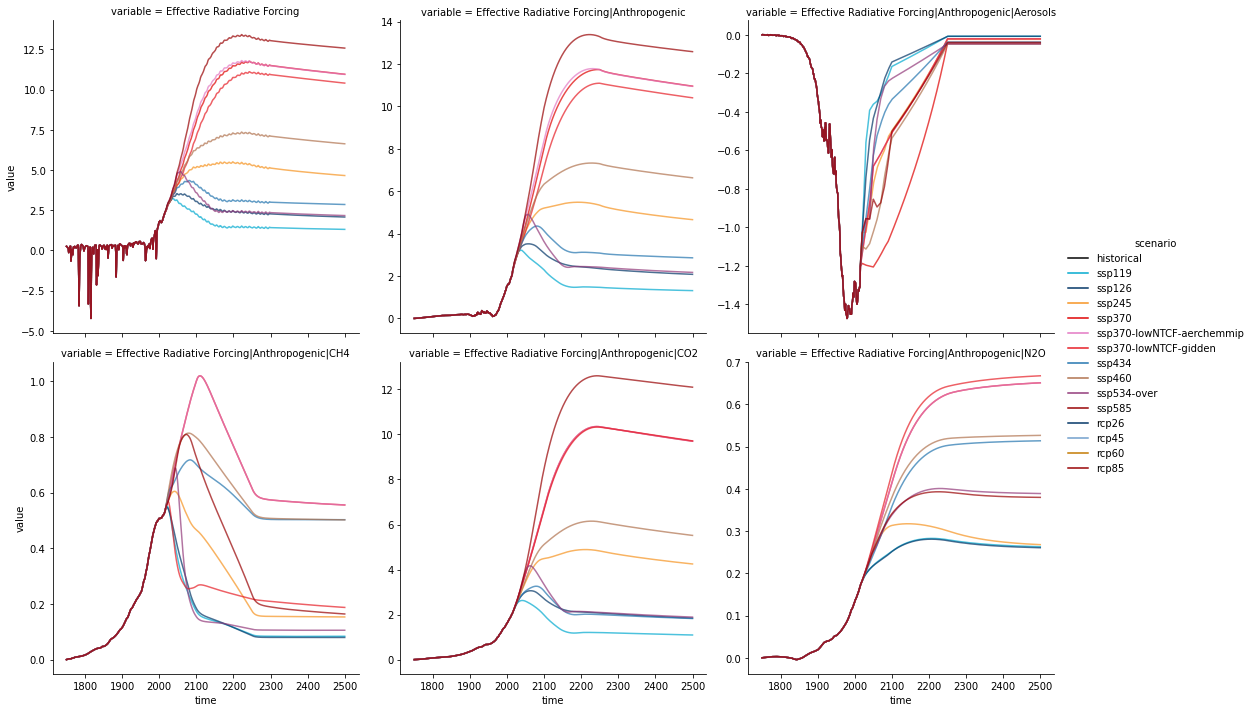

In [11]:
# NBVAL_IGNORE_OUTPUT
sns.relplot(
    data=seaborn_df,
    x="time",
    y="value",
    col="variable",
    col_wrap=3,
    hue="scenario",
    palette=RCMIP_SCENARIO_COLOURS,
    hue_order=RCMIP_SCENARIO_COLOURS.keys(),
    alpha=0.7,
    facet_kws={"sharey": False},
    kind="line",
)

### Variable scatter plots

Sometimes we don't want to plot against time, rather we want to plot variables against each other. For example, we might want to see how the effective radiative forcings relate to each other in the different scenarios. In such a case we can reshape the data using pandas before using seaborn.

In [12]:
# NBVAL_IGNORE_OUTPUT
ts = rcmip_db.filter(variable=vars_to_plot[:4]).timeseries()
ts.head()

time                                                                                                                      1750-01-01 00:00:00  1751-01-01 00:00:00  1752-01-01 00:00:00  1753-01-01 00:00:00  1754-01-01 00:00:00  1755-01-01 00:00:00  \
activity_id    mip_era model   region scenario                  unit  variable                                                                                                                                                                           
not_applicable CMIP6   AIM/CGE World  ssp370                    W/m^2 Effective Radiative Forcing                                    0.259367             0.242788             0.214656             0.179488             0.145354             0.098651   
                                                                      Effective Radiative Forcing|Anthropogenic                      0.000000             0.001756             0.003698             0.004707             0.004987             0.007033   
                                                                      Effective Radiative Forcing|Anthropogenic|Aerosols             0.000000             0.000836             0.001212             0.000801            -0.000571             0.000063   
                                                                      Effective Radiative Forcing|Anthropogenic|CO2                  0.000000             0.000824             0.001647             0.002330             0.003153             0.004097   
                                      ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing                                    0.259367             0.242788             0.214656             0.179488             0.145354             0.098651   

time                                                                                                                      1756-01-01 00:00:00  ...  2494-01-01 00:00:00  2495-01-01 00:00:00  2496-01-01 00:00:00  2497-01-01 00:00:00  \
activity_id    mip_era model   region scenario                  unit  variable                                                                 ...                                                                                       
not_applicable CMIP6   AIM/CGE World  ssp370                    W/m^2 Effective Radiative Forcing                                   -0.133032  ...            10.971275            10.968806            10.966383            10.963918   
                                                                      Effective Radiative Forcing|Anthropogenic                      0.008562  ...            10.971275            10.968806            10.966383            10.963918   
                                                                      Effective Radiative Forcing|Anthropogenic|Aerosols             0.000618  ...            -0.043755            -0.043755            -0.043755            -0.043755   
                                                                      Effective Radiative Forcing|Anthropogenic|CO2                  0.004859  ...             9.712146             9.709772             9.707446             9.705070   
                                      ssp370-lowNTCF-aerchemmip W/m^2 Effective Radiative Forcing                                   -0.133032  ...            10.962031            10.959561            10.957139            10.954674   

time                                                                                                                      2498-01-01 00:00:00  2499-01-01 00:00:00  2500-01-01 00:00:00  
activity_id    mip_era model   region scenario                  unit  variable                                                                                                           
not_applicable CMIP6   AIM/CGE World  ssp370                    W/m^2 Effective Radiative Forcing                                   10.961447            10.959022            10.957785  
                                                    

In [13]:
# NBVAL_IGNORE_OUTPUT
ts_reshaped = ts.unstack("variable").stack("time").reset_index()
ts_reshaped.head()

variable,activity_id,mip_era,model,region,scenario,unit,time,Effective Radiative Forcing,Effective Radiative Forcing|Anthropogenic,Effective Radiative Forcing|Anthropogenic|Aerosols,Effective Radiative Forcing|Anthropogenic|CO2
0,not_applicable,CMIP6,AIM/CGE,World,ssp370,W/m^2,1750-01-01 00:00:00,0.259367,0.000000,0.000000,0.000000
1,not_applicable,CMIP6,AIM/CGE,World,ssp370,W/m^2,1751-01-01 00:00:00,0.242788,0.001756,0.000836,0.000824
2,not_applicable,CMIP6,AIM/CGE,World,ssp370,W/m^2,1752-01-01 00:00:00,0.214656,0.003698,0.001212,0.001647
3,not_applicable,CMIP6,AIM/CGE,World,ssp370,W/m^2,1753-01-01 00:00:00,0.179488,0.004707,0.000801,0.002330
4,not_applicable,CMIP6,AIM/CGE,World,ssp370,W/m^2,1754-01-01 00:00:00,0.145354,0.004987,-0.000571,0.003153


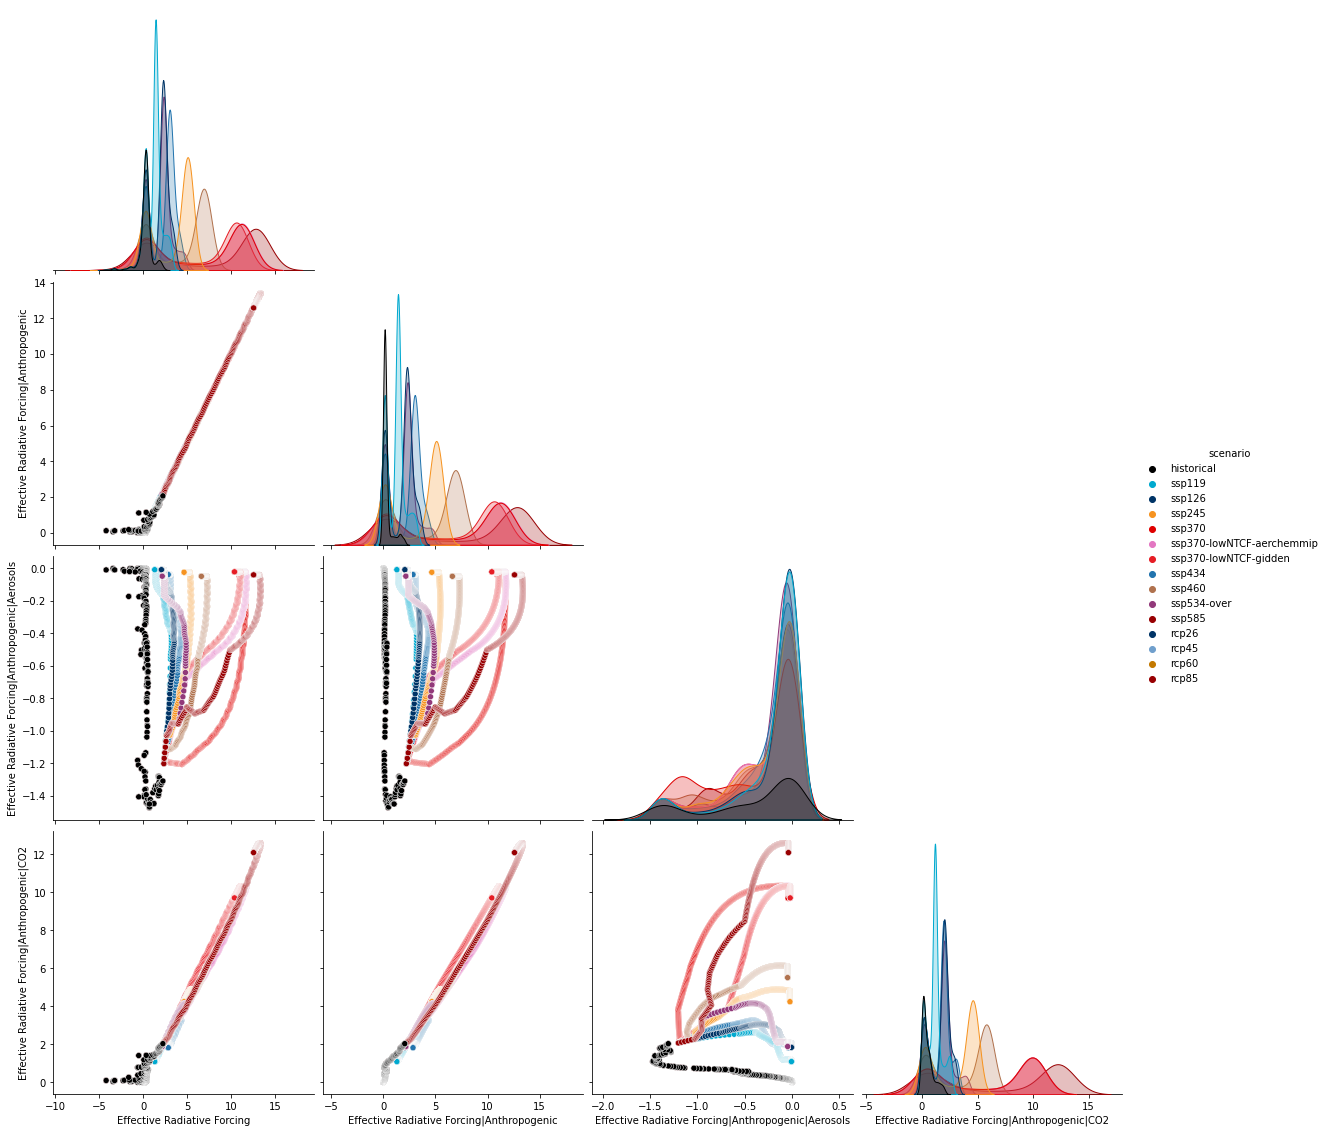

In [14]:
# NBVAL_IGNORE_OUTPUT
sns.pairplot(
    ts_reshaped,
    hue="scenario",
    palette=RCMIP_SCENARIO_COLOURS,
    hue_order=RCMIP_SCENARIO_COLOURS.keys(),
    corner=True,
    height=4,
)